In [197]:
# https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5
# https://colab.research.google.com/drive/1l4bbQkcjn7Oy-SMnaLnlobQ4sorgHB2S?usp=sharing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline
coin = 'TRX'
#goal = "BCH-USD"
#data = web.DataReader(goal, 'yahoo')

data = pd.read_csv("data/"+coin+".csv")

In [198]:
data.reset_index(level=0, inplace=True)
data.tail()

,index,Date,Open,High,Low,Close,Volume,Market Cap
1122,1122,"Sep 17, 2017","0,001836","0,003879","0,001781","0,00332",124.998,0
1123,1123,"Sep 16, 2017","0,001815","0,017671","0,001371","0,001831","54.534,70",0
1124,1124,"Sep 15, 2017","0,001419","0,001831","0,001091","0,001801","26.474,80",0
1125,1125,"Sep 14, 2017","0,002006","0,002479","0,001298","0,001427","58.769,70",0
1126,1126,"Sep 13, 2017","0,002051","0,002447","0,001711","0,001988","48.512,00",0


In [199]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,"Oct 13, 2020","0,026788"
1,"Oct 12, 2020","0,027082"
2,"Oct 11, 2020","0,026467"
3,"Oct 10, 2020","0,02637"
4,"Oct 09, 2020","0,026389"


In [200]:
def stringToFloat(value):
    valueDot = str(value).replace(',', '.')
    valueDot = valueDot.split('.')
    
    #print(valueDot)
    valueFinal = ""
    for index in range(0, len(valueDot)-1):
        valueFinal += str(valueDot[index])
    valueFinal += "." + str(valueDot[-1])
    #print(valueFinal)
    return float(valueFinal)

data['y'] = data['y'].apply(stringToFloat)

In [201]:
data.head(5)

,ds,y
0,"Oct 13, 2020",0.026788
1,"Oct 12, 2020",0.027082
2,"Oct 11, 2020",0.026467
3,"Oct 10, 2020",0.026370
4,"Oct 09, 2020",0.026389


In [202]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

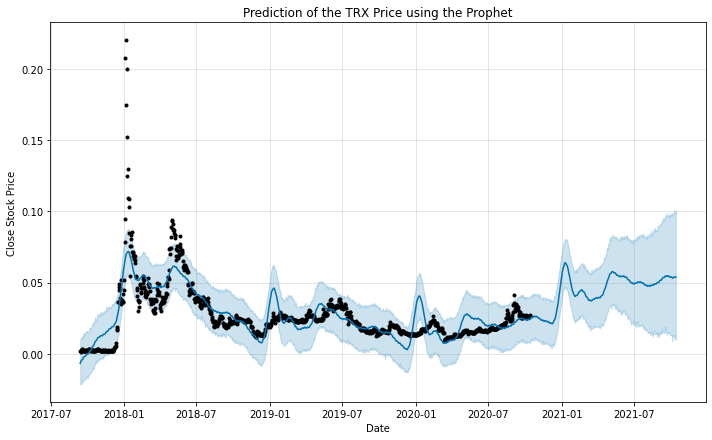

In [203]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the " + coin + " Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

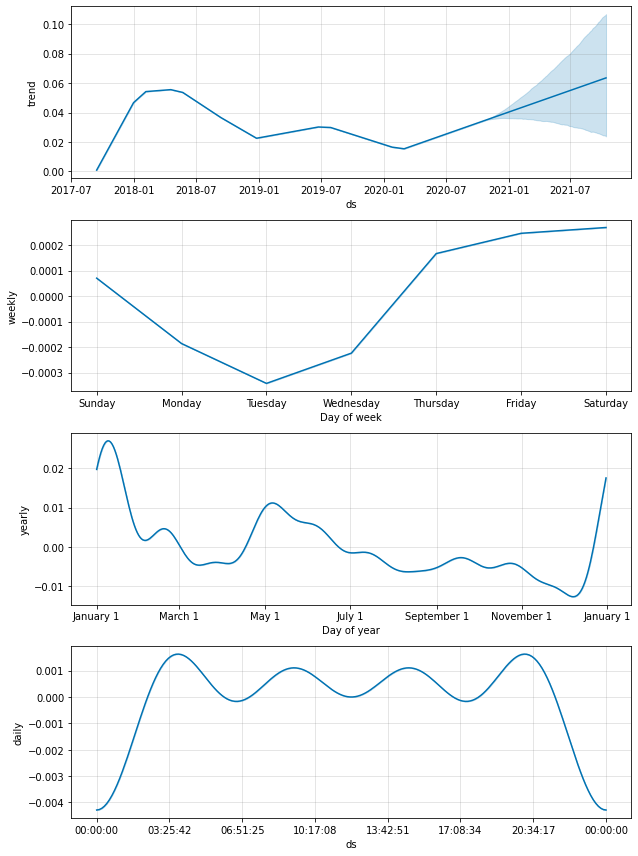

In [204]:
# Plot the trend, weekly, seasonally, yearly and daily components
m.plot_components(prediction)
plt.show()

In [205]:
future_prediction = prediction[-365:]
future_prediction= future_prediction[['ds', 'yhat']]
future_prediction.head(10)

,ds,yhat
1127,2020-10-14,0.024366
1128,2020-10-15,0.024957
1129,2020-10-16,0.025243
1130,2020-10-17,0.025472
1131,2020-10-18,0.025475
1132,2020-10-19,0.025410
1133,2020-10-20,0.025429
1134,2020-10-21,0.025703
1135,2020-10-22,0.026223
1136,2020-10-23,0.026405


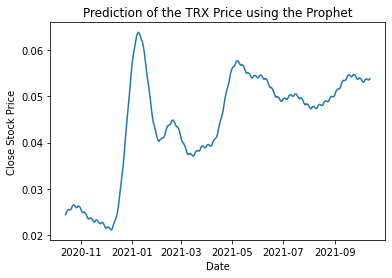

In [206]:
plt.plot(future_prediction.ds.values, future_prediction.yhat.values)
plt.title("Prediction of the " + coin + " Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [91]:
future_prediction[future_prediction['ds'] == '2021-01-01']

,ds,yhat
1258,2021-01-01,616.317603


In [94]:
future_prediction[future_prediction['ds'] > '2020-12-20']['yhat'].head(20)

1247    492.141362
1248    512.199793
1249    538.270580
1250    547.112315
1251    569.015956
1252    589.584702
1253    602.095777
1254    609.382587
1255    613.441962
1256    622.353174
1257    613.127435
1258    616.317603
1259    617.793256
1260    611.097770
1261    599.325907
1262    584.726768
1263    575.618821
1264    549.235813
1265    536.333312
1266    522.961117
Name: yhat, dtype: float64

In [95]:
future

,ds
0,2017-07-23
1,2017-07-24
2,2017-07-25
3,2017-07-26
4,2017-07-27
...,...
1532,2021-10-02
1533,2021-10-03
1534,2021-10-04
1535,2021-10-05
